# Деревья решений

**Цель работы:**
Научиться применять модель дерева принятия решений для задач классификации и регрессии.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, mean_squared_error, r2_score

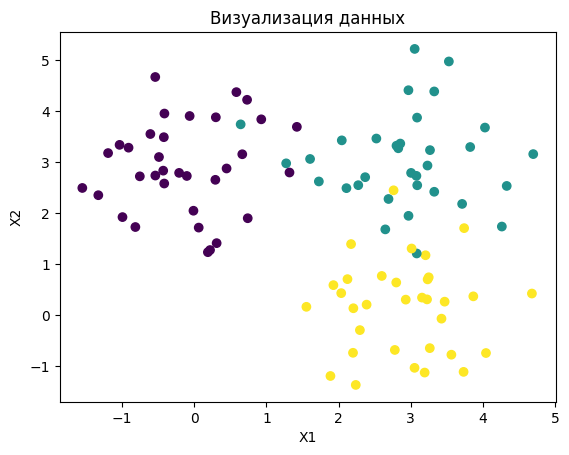

In [2]:
RANDOM_SEED = 42
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], n_features=2, random_state=RANDOM_SEED, cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [4]:
depth = 4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

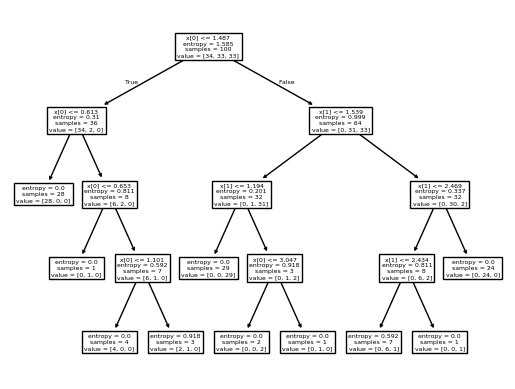

In [5]:
plot_tree(clf_tree)
plt.show()

In [6]:
X0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

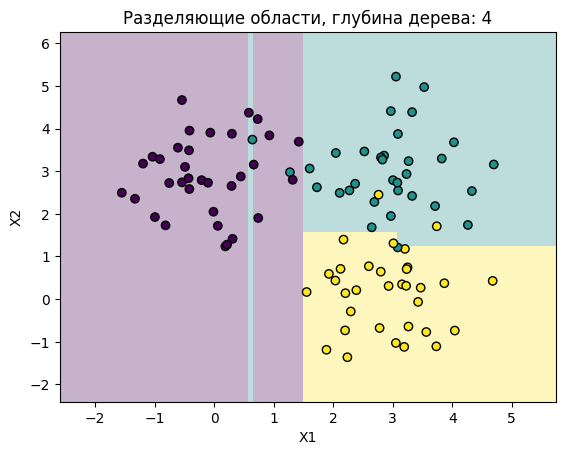

In [7]:
y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
plt.title(f'Разделяющие области, глубина дерева: {depth}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [8]:
y_pred = clf_tree.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print(f"Accuracy: {accuracy_score(y, y_pred):.2f}, F1 Score: {f1_score(y, y_pred, average='micro'):.2f}")

Confusion Matrix:
 [[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy: 0.98, F1 Score: 0.98


In [9]:
observation_new = [[2, 1]]
predicted_class = clf_tree.predict(observation_new)
print("New observation prediction:", predicted_class)

New observation prediction: [2]


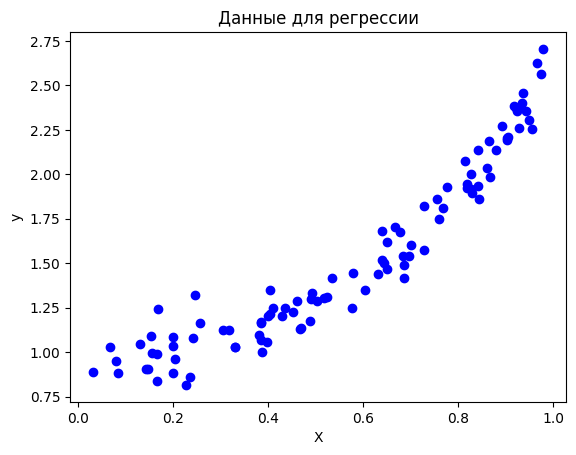

In [10]:
# Задача регрессии
n_samples = 100
X_reg = np.sort(np.random.rand(n_samples)).reshape(-1, 1)  # X_reg имеет форму (100, 1)
y_reg = np.exp(X_reg.ravel() ** 2) + np.random.normal(0.0, 0.1, n_samples)  # y_reg имеет длину 100

# Визуализация данных
plt.scatter(X_reg, y_reg, c="blue", label="Data")
plt.title("Данные для регрессии")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [11]:
depth = 3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X_reg, y_reg)

DecisionTreeRegressor(max_depth=3, random_state=42)

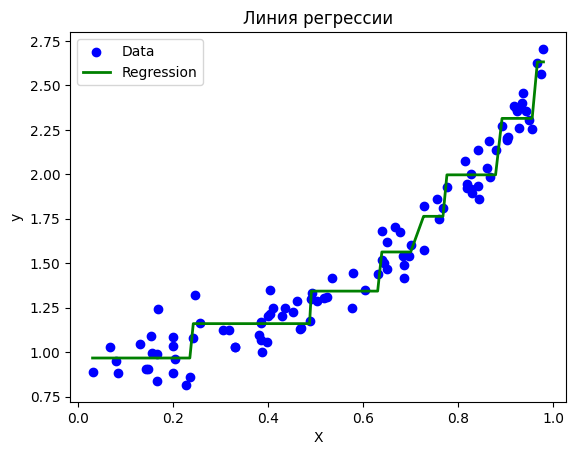

In [12]:
y_pred_reg = reg_tree.predict(X_reg)
plt.scatter(X_reg, y_reg, c="blue", label="Data")
plt.plot(X_reg, y_pred_reg, color="green", lw=2, label="Regression")
plt.title("Линия регрессии")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [13]:
# Оценка качества модели
print(f"R2 Score: {r2_score(y_reg, y_pred_reg):.2f}, MSE: {mean_squared_error(y_reg, y_pred_reg):.4f}")

R2 Score: 0.97, MSE: 0.0082


# Задания для самостоятельного выполнения

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

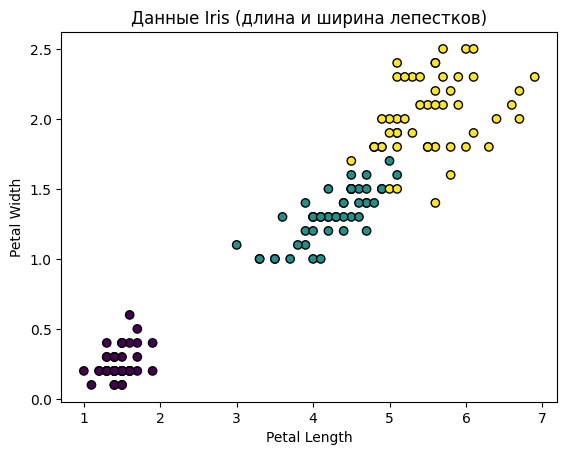

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x, iris_y = iris.data[:, 2:], iris.target  # Длина и ширина лепестков
plt.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors='black')
plt.title("Данные Iris (длина и ширина лепестков)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

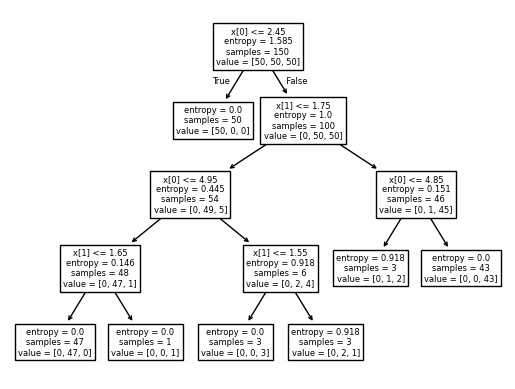

In [15]:
depth = 4
iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=RANDOM_SEED)
iris_tree.fit(iris_x, iris_y)

# Граф дерева
plot_tree(iris_tree)
plt.show()

# 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

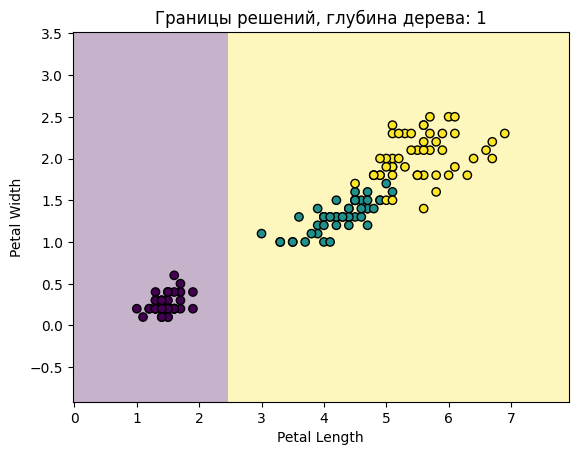

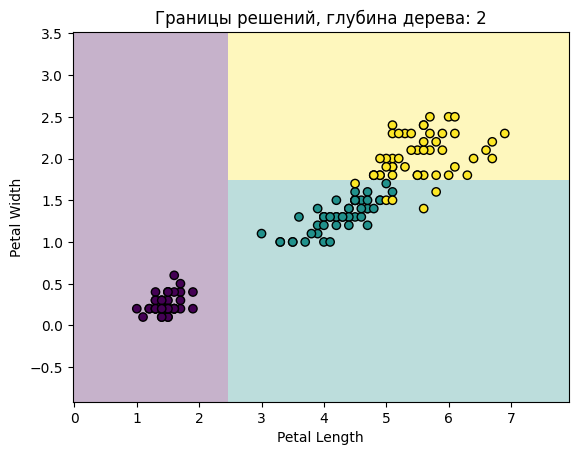

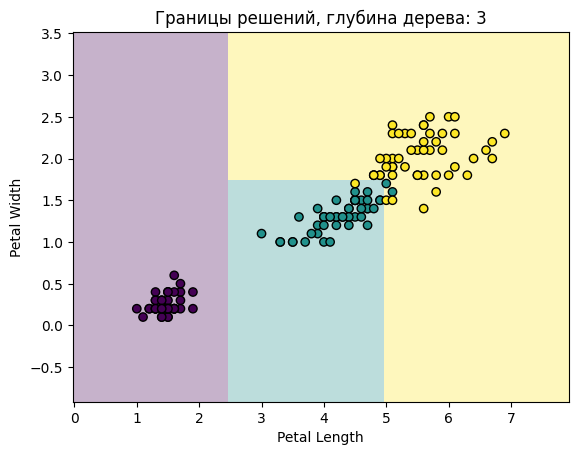

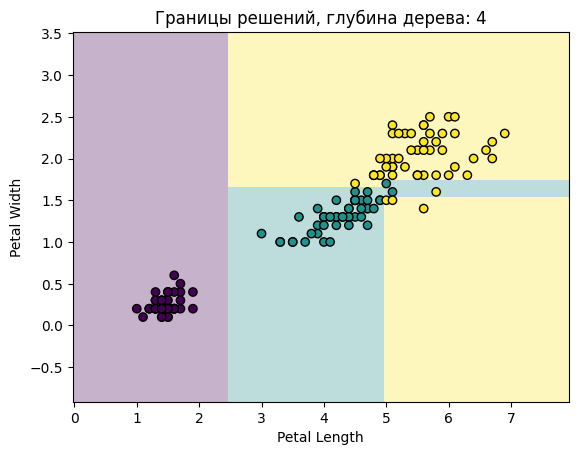

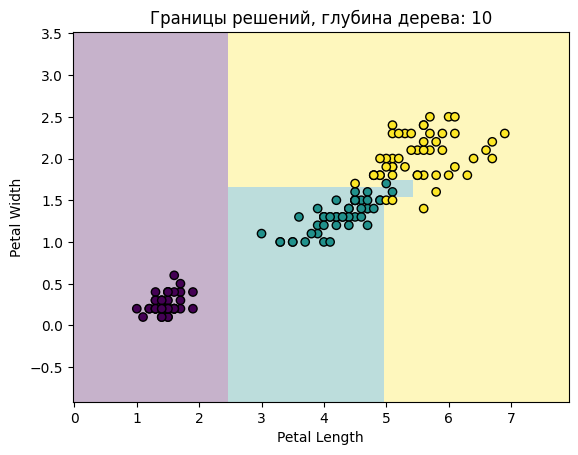

In [16]:
for depth in [1, 2, 3, 4, 10]:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=RANDOM_SEED)
    clf.fit(iris_x, iris_y)

    # Границы решений
    x0 = np.linspace(iris_x[:, 0].min() - 1, iris_x[:, 0].max() + 1, iris_x.shape[0])
    x1 = np.linspace(iris_x[:, 1].min() - 1, iris_x[:, 1].max() + 1, iris_x.shape[0])
    x0_grid, x1_grid = np.meshgrid(x0, x1)
    y_grid_pred = clf.predict(np.c_[x0_grid.ravel(), x1_grid.ravel()]).reshape(x0_grid.shape)

    plt.pcolormesh(x0_grid, x1_grid, y_grid_pred, alpha=0.3)
    plt.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors="black", linewidth=1)
    plt.title(f"Границы решений, глубина дерева: {depth}")
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.show()


# 4.

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Список для хранения метрик
metrics = []

# Обучение дерева и расчет метрик для каждой глубины
for depth in [1, 2, 3, 4, 10]:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=RANDOM_SEED)
    clf_tree.fit(X, y)

    # Предсказания
    y_pred = clf_tree.predict(X)

    # Метрики
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    cm = confusion_matrix(y, y_pred)

    # Сохранение метрик
    metrics.append({"Depth": depth, "Accuracy": acc, "F1 Score": f1})

    # Вывод матрицы ошибок
    print(f"Глубина дерева: {depth}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc:.2f}, F1 Score: {f1:.2f}\n")

# Вывод общей таблицы метрик
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print("Метрики для разных глубин:")
print(metrics_df)


Глубина дерева: 1
Confusion Matrix:
[[34  0  0]
 [ 2  0 31]
 [ 0  0 33]]
Accuracy: 0.67, F1 Score: 0.67

Глубина дерева: 2
Confusion Matrix:
[[34  0  0]
 [ 2 30  1]
 [ 0  2 31]]
Accuracy: 0.95, F1 Score: 0.95

Глубина дерева: 3
Confusion Matrix:
[[34  0  0]
 [ 1 31  1]
 [ 0  2 31]]
Accuracy: 0.96, F1 Score: 0.96

Глубина дерева: 4
Confusion Matrix:
[[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy: 0.98, F1 Score: 0.98

Глубина дерева: 10
Confusion Matrix:
[[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Accuracy: 1.00, F1 Score: 1.00

Метрики для разных глубин:
   Depth  Accuracy  F1 Score
0      1      0.67      0.67
1      2      0.95      0.95
2      3      0.96      0.96
3      4      0.98      0.98
4     10      1.00      1.00


# 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.


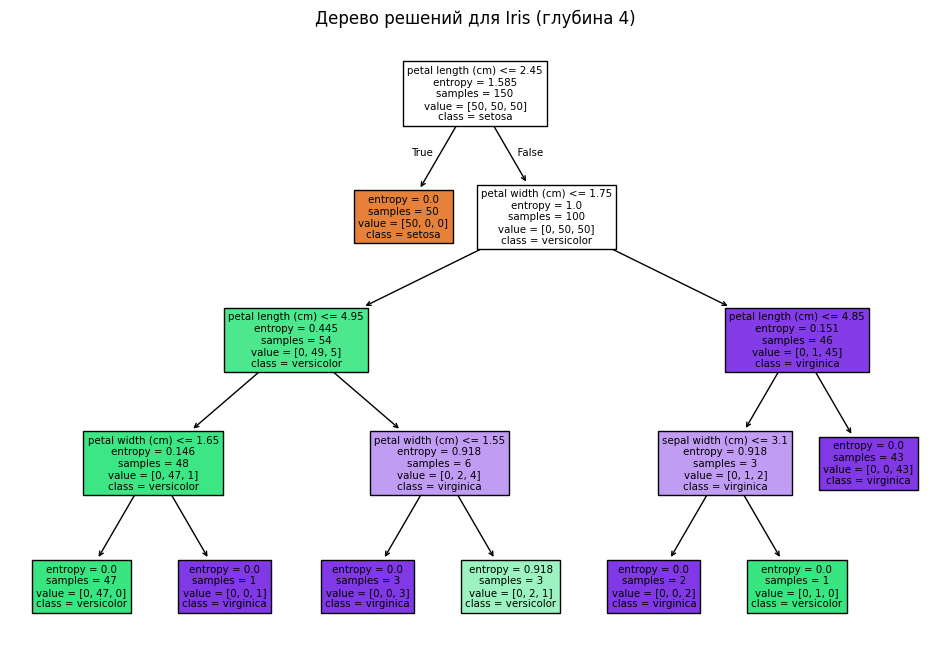

Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy: 0.99
F1 Score: 0.99


In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Загрузка датасета
iris = load_iris()
X, y = iris.data, iris.target

# Создание и обучение модели
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_tree.fit(X, y)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Дерево решений для Iris (глубина 4)")
plt.show()

# Оценка качества работы модели
y_pred = clf_tree.predict(X)

accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='micro')
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")


# 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.


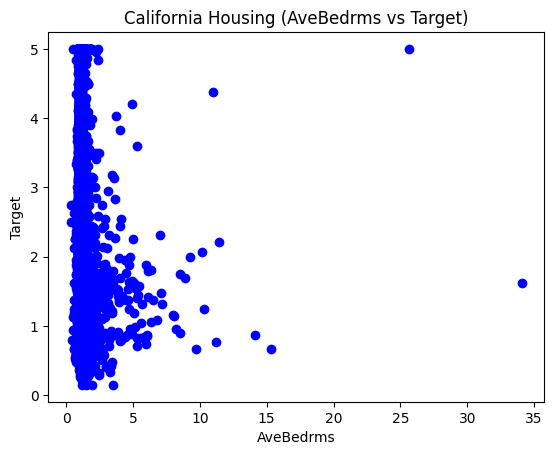

In [19]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_x, housing_y = housing.data[:, [3]], housing.target  # AveBedrms
plt.scatter(housing_x, housing_y, c="blue")
plt.title("California Housing (AveBedrms vs Target)")
plt.xlabel("AveBedrms")
plt.ylabel("Target")
plt.show()

# 7.Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.


In [20]:
reg_tree_housing = DecisionTreeRegressor(random_state=0)
reg_tree_housing.fit(housing_x, housing_y)
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка датасета
data = load_diabetes()
X, y = data.data, data.target

# Создание модели регрессионного дерева
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Прогнозирование
y_pred = regressor.predict(X)

# Оценка модели (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



Mean Squared Error: 0.00


# 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.


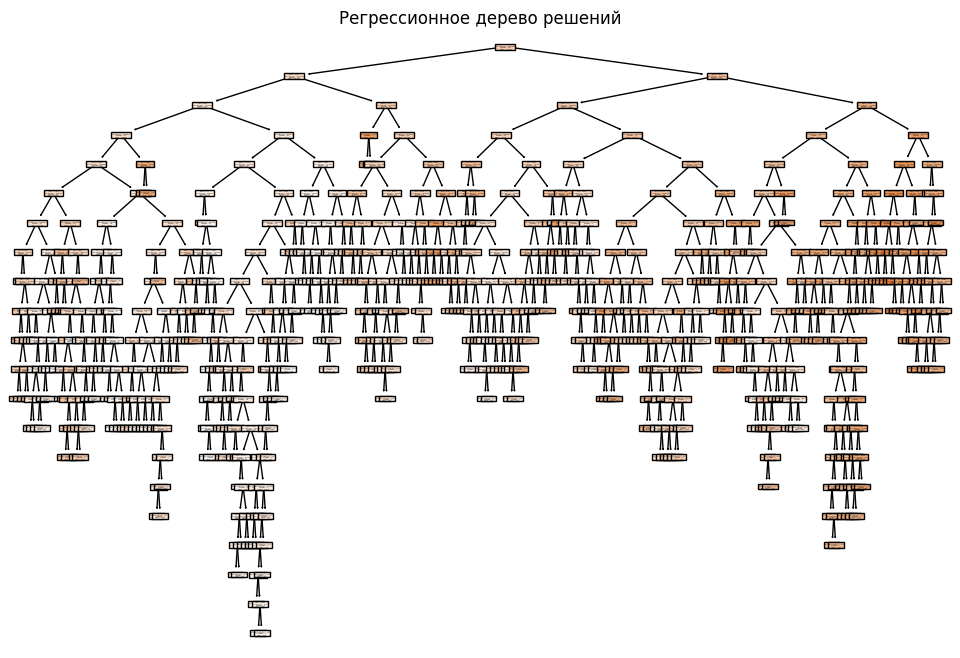

In [21]:
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=data.feature_names)
plt.title("Регрессионное дерево решений")
plt.show()



# Контрольные вопросы

1. Почему граница принятия решений у деревьев решений имеет такую характерную форму?
   - Границы решений формируются ортогонально, так как каждый узел делит пространство на две области по значению одного признака.

2. Как глубина дерева влияет на сложность модели?
   - Большая глубина увеличивает сложность модели, может привести к переобучению.

3. Почему глубина дерева на разных ветках может быть разная?
   - Это связано с количеством информации в данных: одни ветки достигают критериев остановки раньше.

4. Что такое критерий в деревьях решений и как он влияет на работу модели?
   - Критерий (например, энтропия, Джини) определяет, как делить узлы для максимального уменьшения неопределённости.
